# D) Data pre-processing

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [323]:
# Load data
data = pd.read_excel('Concrete_Data.xls')
#print(data)
#print(data.head())
print(data.shape)
print(data.columns)

(1030, 9)
Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [324]:
X = data.iloc[:,:8]
#print(X.head())
y = data.iloc[:,8]
#print(y.head())

In [325]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 130/1030, shuffle = True)
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.reshape(900,1)
y_test = y_test.values.reshape(130,1)
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [326]:
def MSE(y_pred,y):
    MSE_score = np.mean((y_pred-y)**2)
    return MSE_score

In [327]:
def RMSE(y_pred,y):
    RMSE_score = np.sqrt(np.mean((y_pred-y)**2))
    return RMSE_score

In [328]:
def MAE(y_pred,y):
    MAE_score = np.mean(np.abs(y_pred-y))
    return MAE_score

In [329]:
def normalization(X):
    n,m = X.shape
    X_mean = np.mean(X, axis=0).reshape(1,m)
    X_std = np.std(X, axis=0).reshape(1,m)
    X_norm = (X-X_mean) / X_std
    return X_norm

In [330]:
def VE(y_pred,y):
    VE_score = 1-MSE(y_pred,y)/np.var(y)
    return VE_score

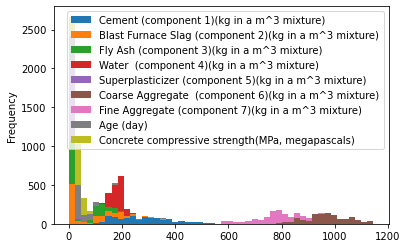

In [161]:
data.plot.hist(stacked=True, bins=50)
plt.show()

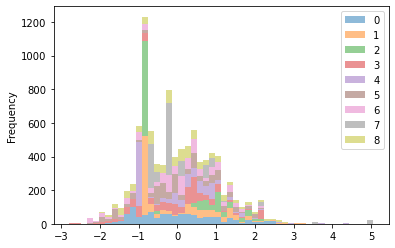

In [331]:
data = data.values
data_norm = normalization(data)

data_norm = pd.DataFrame(data_norm)
data_norm.plot.hist(stacked=True, bins=50, alpha=0.5)
plt.show()

# A) Uni-variate linear regression (MSE)

In [274]:
def gradient_descent(alpha, X, y, m_init, b_init, num_iters):
    m = m_init
    b = b_init

    for i in range(num_iters):
        y_pred = m*X+b
        
        loss = MSE(y_pred,y)
        VE_score_train = VE(y_pred,y)
        
        m_grad = (-2)*np.mean(X*(y-y_pred))
        b_grad = (-2)*np.mean(y-y_pred)

        m = m - alpha * m_grad
        b = b - alpha * b_grad
        
        if i % 500 == 0:
            #print(m_grad)
            #print(b_grad)
            print(f"interations: {i}, loss = {loss}, m = {m}, b = {b}")

    plt.scatter(X, y, color='blue',marker= '.', label='Training Data')
    plt.plot(X, y_pred, color='green', label='Linear Regression')
    plt.grid()
    plt.legend()
    plt.xlabel('component')
    plt.ylabel('Concrete Compressive Strength')
    return (m, b, VE_score_train)

In [275]:
feature_1 = X_train[:,0].reshape(900,1)
feature_2 = X_train[:,1].reshape(900,1)
feature_3 = X_train[:,2].reshape(900,1)
feature_4 = X_train[:,3].reshape(900,1)
feature_5 = X_train[:,4].reshape(900,1)
feature_6 = X_train[:,5].reshape(900,1)
feature_7 = X_train[:,6].reshape(900,1)
feature_8 = X_train[:,7].reshape(900,1)
feature_1_test = X_test[:,0].reshape(130,1)
feature_2_test = X_test[:,1].reshape(130,1)
feature_3_test = X_test[:,2].reshape(130,1)
feature_4_test = X_test[:,3].reshape(130,1)
feature_5_test = X_test[:,4].reshape(130,1)
feature_6_test = X_test[:,5].reshape(130,1)
feature_7_test = X_test[:,6].reshape(130,1)
feature_8_test = X_test[:,7].reshape(130,1)

In [276]:
X_train_norm = normalization(X_train)
X_test_norm = normalization(X_test)
feature_1_norm = X_train_norm[:,0].reshape(900,1)
feature_2_norm = X_train_norm[:,1].reshape(900,1)
feature_3_norm = X_train_norm[:,2].reshape(900,1)
feature_4_norm = X_train_norm[:,3].reshape(900,1)
feature_5_norm = X_train_norm[:,4].reshape(900,1)
feature_6_norm = X_train_norm[:,5].reshape(900,1)
feature_7_norm = X_train_norm[:,6].reshape(900,1)
feature_8_norm = X_train_norm[:,7].reshape(900,1)
feature_1_test_norm = X_test_norm[:,0].reshape(130,1)
feature_2_test_norm = X_test_norm[:,1].reshape(130,1)
feature_3_test_norm = X_test_norm[:,2].reshape(130,1)
feature_4_test_norm = X_test_norm[:,3].reshape(130,1)
feature_5_test_norm = X_test_norm[:,4].reshape(130,1)
feature_6_test_norm = X_test_norm[:,5].reshape(130,1)
feature_7_test_norm = X_test_norm[:,6].reshape(130,1)
feature_8_test_norm = X_test_norm[:,7].reshape(130,1)

## Feature_1: Cement

interations: 0, loss = 1559.368810774143, m = 0.2160729340123367, b = 0.0007134226002648064
interations: 500, loss = 239.9909342085855, m = 0.12206576953522477, b = 0.016707112284015876
interations: 1000, loss = 239.9379913816722, m = 0.12201450471907747, b = 0.032977038761261054
interations: 1500, loss = 239.88517723204782, m = 0.12196330224027667, b = 0.0492271812205164
VE Score of the Training Set: 0.16416955986558646
VE Score of the Testing Set: 0.21693540599626548


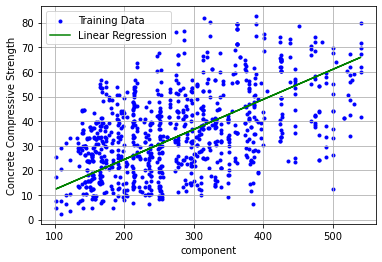

In [48]:
m, b, VE_score_train = gradient_descent(10**(-5), feature_1, y_train, 0, 0, 2000)
y_test_pred = m * feature_1_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 1559.368810774143, m = 0.01658084344427236, b = 0.07134226002648063
interations: 500, loss = 399.35141916722245, m = 5.249692078319659, b = 22.587807343408194
interations: 1000, loss = 242.67422413998648, m = 7.172919355055809, b = 30.862861681149194
interations: 1500, loss = 221.51269361534696, m = 7.879727024904627, b = 33.904037284823566
interations: 2000, loss = 218.65452160079553, m = 8.139486798593438, b = 35.02170354717094
interations: 2500, loss = 218.26848396257972, m = 8.234951438983202, b = 35.43245847775768
interations: 3000, loss = 218.21634397332764, m = 8.270035768767341, b = 35.58341553773645
interations: 3500, loss = 218.20930171057893, m = 8.282929654832131, b = 35.63889395627872
VE Score of the Training Set: 0.2395313035152019
VE Score of the Testing Set: 0.31275036342816465


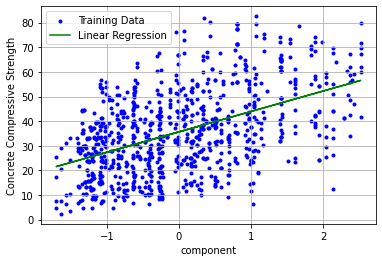

In [88]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_1_norm, y_train, 0, 0, 4000)
y_test_norm_pred = m * feature_1_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_2: Blast Furnace Slag

interations: 0, loss = 1559.368810774143, m = 0.057803243587243536, b = 0.0007134226002648064
interations: 500, loss = 916.0027583926999, m = 0.21895626863646428, b = 0.19324491773774582
interations: 1000, loss = 908.7435238592656, m = 0.21787163589556097, b = 0.3837554716383666
interations: 1500, loss = 901.5671910499992, m = 0.2167932142861431, b = 0.5731750699970574
interations: 2000, loss = 894.472813212755, m = 0.2157209682402688, b = 0.7615099601527193
interations: 2500, loss = 887.4594544074621, m = 0.21465486239367534, b = 0.9487663536689724
interations: 3000, loss = 880.5261893826482, m = 0.21359486158461294, b = 1.134950426539018
interations: 3500, loss = 873.6721034533742, m = 0.212540930852685, b = 1.320068319389331
interations: 4000, loss = 866.8962923805627, m = 0.2114930354376949, b = 1.5041261376821997
interations: 4500, loss = 860.1978622517039, m = 0.2104511407784999, b = 1.687129951917075
interations: 5000, loss = 853.575929362925, m = 0.20941521251187104, b = 1.8690

interations: 46000, loss = 503.857438977988, m = 0.1418625875812644, b = 13.734381309980293
interations: 46500, loss = 501.30497585823645, m = 0.14121943053224714, b = 13.847348769870287
interations: 47000, loss = 498.78166231238725, m = 0.1405799565114538, b = 13.959669323466086
interations: 47500, loss = 496.28716544722283, m = 0.139944144428084, b = 14.07134667526593
interations: 48000, loss = 493.82115617122486, m = 0.13931197331211342, b = 14.182384508554296
interations: 48500, loss = 491.38330915115864, m = 0.13868342231360262, b = 14.292786485523342
interations: 49000, loss = 488.9733027691495, m = 0.13805847070200844, b = 14.402556247393829
interations: 49500, loss = 486.5908190802568, m = 0.1374370978655012, b = 14.51169741453507
interations: 50000, loss = 484.2355437705261, m = 0.13681928331028453, b = 14.620213586584391
interations: 50500, loss = 481.9071661155231, m = 0.13620500665991933, b = 14.728108342565873
interations: 51000, loss = 479.60537893934094, m = 0.1355942476

interations: 92000, loss = 358.0430571879282, m = 0.09576680464058397, b = 21.8308851396526
interations: 92500, loss = 357.15581973394006, m = 0.09538761433161914, b = 21.897488104020493
interations: 93000, loss = 356.27871468638494, m = 0.0950105954496991, b = 21.963709667612388
interations: 93500, loss = 355.41162633141374, m = 0.0946357355601823, b = 22.0295520145136
interations: 94000, loss = 354.55444027665084, m = 0.09426302229963453, b = 22.095017316302226
interations: 94500, loss = 353.7070434361009, m = 0.09389244337542031, b = 22.160107732120903
interations: 95000, loss = 352.8693240152314, m = 0.09352398656529823, b = 22.22482540874788
interations: 95500, loss = 352.04117149622147, m = 0.09315763971701656, b = 22.289172480668057
interations: 96000, loss = 351.2224766233838, m = 0.09279339074791382, b = 22.353151070143145
interations: 96500, loss = 350.41313138875023, m = 0.09243122764451962, b = 22.41676328728176
interations: 97000, loss = 349.6130290178224, m = 0.0920711384

interations: 136500, loss = 308.30465926919385, m = 0.06926825274526015, b = 26.48522905604411
interations: 137000, loss = 307.9854429923448, m = 0.06904080595628112, b = 26.525178996809522
interations: 137500, loss = 307.6698722210393, m = 0.06881466163758446, b = 26.56490016489864
interations: 138000, loss = 307.35790532296807, m = 0.06858981233059538, b = 26.604393870374448
interations: 138500, loss = 307.0495011412708, m = 0.068366250619451, b = 26.643661415797812
interations: 139000, loss = 306.74461898910494, m = 0.06814396913075485, b = 26.682704096270548
interations: 139500, loss = 306.4432186442793, m = 0.06792296053333427, b = 26.72152319947808
interations: 140000, loss = 306.14526034394686, m = 0.0677032175379984, b = 26.76012000573192
interations: 140500, loss = 305.85070477935966, m = 0.0674847328972979, b = 26.79849578801189
interations: 141000, loss = 305.5595130906813, m = 0.06726749940528534, b = 26.83665181200819
interations: 141500, loss = 305.2716468618628, m = 0.06

interations: 181500, loss = 290.29459312552416, m = 0.05323740375125263, b = 29.30097101751397
interations: 182000, loss = 290.181054944459, m = 0.05310175735439739, b = 29.32479665841984
interations: 182500, loss = 290.06881338921926, m = 0.052966887734394404, b = 29.348485862186394
interations: 183000, loss = 289.957853652112, m = 0.05283279044304399, b = 29.37203941011863
interations: 183500, loss = 289.8481610945506, m = 0.05269946105761873, b = 29.39545807904747
interations: 184000, loss = 289.7397212451238, m = 0.05256689518071828, b = 29.418742641355255
interations: 184500, loss = 289.6325197976861, m = 0.052435088440123276, b = 29.441893865001408
interations: 185000, loss = 289.5265426094709, m = 0.052304036488652464, b = 29.46491251354752
interations: 185500, loss = 289.42177569922444, m = 0.05217373500401836, b = 29.487799346182726
interations: 186000, loss = 289.31820524536107, m = 0.05204417968868481, b = 29.51055511774869
interations: 186500, loss = 289.2158175841407, m = 

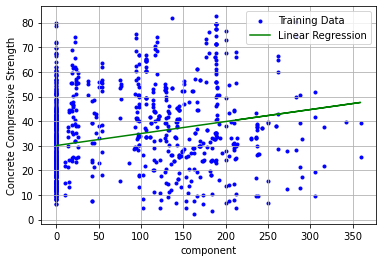

In [51]:
m, b, VE_score_train = gradient_descent(10**(-5), feature_2, y_train, 0, 0, 200000)
y_test_pred = m * feature_1_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 1559.368810774143, m = 0.005132873193204853, b = 0.07134226002648063
interations: 500, loss = 453.1023980827345, m = 1.6251286511419925, b = 22.587807343408194
interations: 1000, loss = 303.6850533537639, m = 2.22049533235925, b = 30.862861681149194
interations: 1500, loss = 283.50407104269397, m = 2.43929928847355, b = 33.904037284823566
interations: 2000, loss = 280.7783363043443, m = 2.519712204952825, b = 35.021703547170944
interations: 2500, loss = 280.4101862435928, m = 2.549264856794846, b = 35.432458477757685
interations: 3000, loss = 280.36046223144865, m = 2.5601257889576625, b = 35.58341553773646
interations: 3500, loss = 280.3537462814943, m = 2.56411730376574, b = 35.63889395627873
VE Score of the Training Set: 0.022954174346516254
VE Score of the Testing Set: -0.035365098305146114


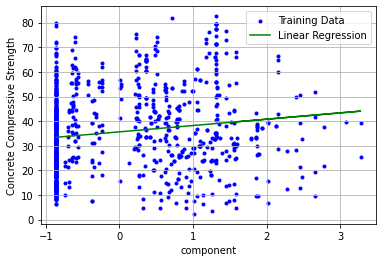

In [89]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_2_norm, y_train, 0, 0, 4000)
y_test_norm_pred = m * feature_2_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_3: Fly Ash

interations: 0, loss = 1559.368810774143, m = 0.363056119900744, b = 0.007134226002648064
interations: 500, loss = 1001.2853133705421, m = 0.2421281653094042, b = 2.115124646652255
interations: 1000, loss = 922.1188308978831, m = 0.2268339599011921, b = 4.10416185198945
interations: 1500, loss = 851.6887487016554, m = 0.21240831153168174, b = 5.980241749717347
interations: 2000, loss = 789.0309631940006, m = 0.1988018948969856, b = 7.749779178788221
interations: 2500, loss = 733.2877642327253, m = 0.18596818587436514, b = 9.418824679822057
interations: 3000, loss = 683.6960940953132, m = 0.17386330244331544, b = 10.993085183587729
interations: 3500, loss = 639.5771021313541, m = 0.16244585464073305, b = 12.477943524586472
interations: 4000, loss = 600.3268521090741, m = 0.15167680303712025, b = 13.878476846460174
interations: 4500, loss = 565.4080550506548, m = 0.14151932524991745, b = 15.199473962157624
interations: 5000, loss = 534.3427143887501, m = 0.13193869003753678, b = 16.44545

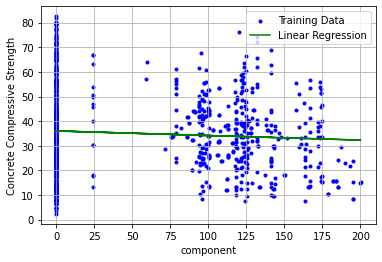

In [53]:
m, b, VE_score_train = gradient_descent(10**(-4), feature_3, y_train, 0, 0, 30000)
y_test_pred_3 = m * feature_3_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 1559.368810774143, m = -0.0034845271570730246, b = 0.07134226002648063
interations: 500, loss = 456.17388293574504, m = -1.1032427074447133, b = 22.587807343408194
interations: 1000, loss = 307.1713868416486, m = -1.5074162163216482, b = 30.862861681149194
interations: 1500, loss = 287.0464358633356, m = -1.6559545297490321, b = 33.904037284823566
interations: 2000, loss = 284.3282689701868, m = -1.710544031711097, b = 35.021703547170944
interations: 2500, loss = 283.9611410568333, m = -1.7306062880792028, b = 35.432458477757685
interations: 3000, loss = 283.9115551005393, m = -1.7379793930923104, b = 35.58341553773646
interations: 3500, loss = 283.90485779703243, m = -1.7406890921678713, b = 35.63889395627873
VE Score of the Training Set: 0.010578337009753636
VE Score of the Testing Set: 0.010808613502210296


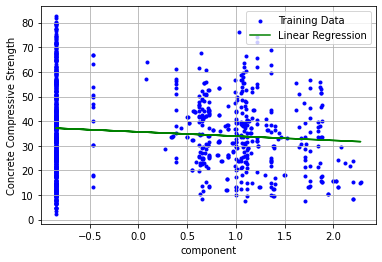

In [90]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_3_norm, y_train, 0, 0, 4000)
y_test_norm_pred = m * feature_3_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_4: Water

interations: 0, loss = 1559.368810774143, m = 0.12716148158678295, b = 0.0007134226002648064
interations: 500, loss = 347.02036416916525, m = 0.19060979088750435, b = 0.011928024121540388
interations: 1000, loss = 346.9967420745581, m = 0.19055067711195714, b = 0.022795725391323816
interations: 1500, loss = 346.97312631657854, m = 0.1904915712655777, b = 0.03366196893275417
interations: 2000, loss = 346.94951689352655, m = 0.19043247334730246, b = 0.044526754941362386
interations: 2500, loss = 346.92591380370317, m = 0.190373383356068, b = 0.05539008361265326
interations: 3000, loss = 346.9023170454091, m = 0.190314301290811, b = 0.06625195514210533
interations: 3500, loss = 346.8787266169464, m = 0.19025522715046836, b = 0.07711236972517067
VE Score of the Training Set: -0.20881035293903372
VE Score of the Testing Set: -0.17804765430819547


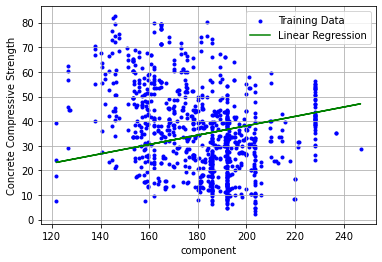

In [58]:
m, b, VE_score_train = gradient_descent(10**(-5), feature_4, y_train, 0, 0, 4000)
y_pred = m * feature_4_test + b
VE_score_test = VE(y_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 1559.368810774143, m = -0.010579020629302745, b = 0.07134226002648063
interations: 500, loss = 434.5994193495007, m = -3.349443650480595, b = 22.587807343408194
interations: 1000, loss = 282.68297863408486, m = -4.5765139803954265, b = 30.862861681149194
interations: 1500, loss = 262.1644571170572, m = -5.027476137140416, b = 33.904037284823566
interations: 2000, loss = 259.39313280704783, m = -5.193209805258852, b = 35.021703547170944
interations: 2500, loss = 259.0188252125716, m = -5.254118793601142, b = 35.432458477757685
VE Score of the Training Set: 0.09748052530233187
VE Score of the Testing Set: -0.03825722780216245


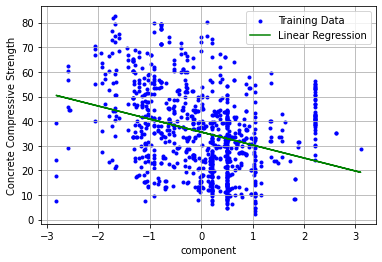

In [91]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_4_norm, y_train, 0, 0, 3000)
y_test_norm_pred = m * feature_4_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_5: Superplasticizer

interations: 0, loss = 1559.368810774143, m = 0.518885944929116, b = 0.07134226002648063
interations: 500, loss = 395.562305033974, m = 2.6068605586970723, b = 11.104867983551767
interations: 1000, loss = 303.09599872025274, m = 2.037234307828972, b = 17.812821272391886
interations: 1500, loss = 267.2824496864772, m = 1.6827296703247097, b = 21.987489391060496
interations: 2000, loss = 253.41133981383905, m = 1.4621051155038893, b = 24.585577533687015
interations: 2500, loss = 248.0388566534199, m = 1.3248002990350176, b = 26.202487382561284
interations: 3000, loss = 245.95801556903626, m = 1.2393491911977221, b = 27.20876481268089
interations: 3500, loss = 245.15207546849592, m = 1.1861690332221484, b = 27.835017579384736
interations: 4000, loss = 244.83992311311735, m = 1.1530725728732478, b = 28.224763504380352
interations: 4500, loss = 244.71902195321346, m = 1.1324751220697038, b = 28.46732033466827
VE Score of the Training Set: 0.14730308397820402
VE Score of the Testing Set: -0.

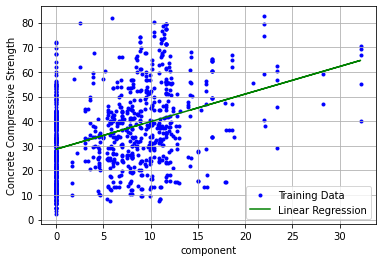

In [59]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_5, y_train, 0, 0, 5000)
y_pred = m * feature_5_test + b
VE_score_test = VE(y_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 1561.1721998564442, m = 0.011847990260956738, b = 0.07154022762874893
interations: 500, loss = 424.1325528084576, m = 3.7512145160769053, b = 22.650486238898925
interations: 1000, loss = 270.5588358769759, m = 5.125473800350383, b = 30.94850302085286
interations: 1500, loss = 249.81647513926325, m = 5.6305295544128295, b = 33.99811758121448
interations: 2000, loss = 247.01491809180706, m = 5.816143228361147, b = 35.118885255123736
interations: 2500, loss = 246.63652712708534, m = 5.884358342592539, b = 35.530779989365406
interations: 3000, loss = 246.585419932137, m = 5.909428164823947, b = 35.682155940015654
interations: 3500, loss = 246.57851716325774, m = 5.918641606651252, b = 35.73778830559431
interations: 4000, loss = 246.57758484407552, m = 5.922027650218759, b = 35.75823382607875
interations: 4500, loss = 246.57745892083037, m = 5.9232720593392525, b = 35.76574778496822
VE Score of the Training Set: 0.12459108679436504
VE Score of the Testing Set: 0.21576

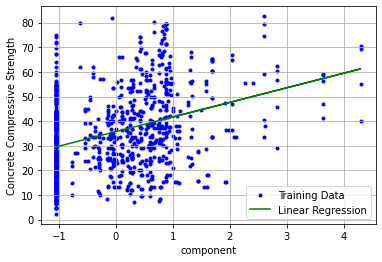

In [278]:
m, b, VE_score_train = m, b, VE_score_train = gradient_descent(10**(-3), feature_5_norm, y_train, 0, 0, 5000)
y_test_norm_pred = m * feature_5_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_6: Coarse Aggregate

interations: 0, loss = 1561.4467803281636, m = 0.06936657425709586, b = 7.176167834582123e-05
interations: 500, loss = 298.6011942611662, m = 0.036410262356180924, b = 0.0004958966056477706
interations: 1000, loss = 298.6007751159532, m = 0.03640979480124244, b = 0.0009536873699282171
interations: 1500, loss = 298.60035597608595, m = 0.03640932724928555, b = 0.001411475214899457
VE Score of the Training Set: -0.0897324303135516
VE Score of the Testing Set: -0.05815286914213558


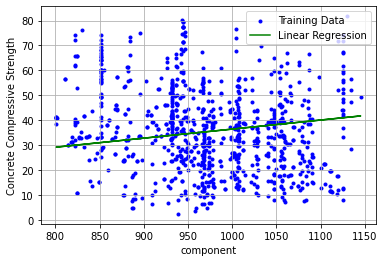

In [188]:
m, b, VE_score_train = gradient_descent(10**(-6), feature_6, y_train, 0, 0, 2000)
y_test_pred = m * feature_6_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 1561.1721998564442, m = -0.005573521688690174, b = 0.07154022762874893
interations: 500, loss = 447.7692347510715, m = -1.764643201402818, b = 22.650486238898925
interations: 1000, loss = 297.38799497839307, m = -2.4111211067757465, b = 30.94850302085286
interations: 1500, loss = 277.07682464355617, m = -2.6487090130167767, b = 33.99811758121449
interations: 2000, loss = 274.333506121948, m = -2.736025242578305, b = 35.11888525512374
interations: 2500, loss = 273.96298111590795, m = -2.7681149396738567, b = 35.530779989365406
interations: 3000, loss = 273.9129363329126, m = -2.779908264521429, b = 35.68215594001566
interations: 3500, loss = 273.90617705819636, m = -2.784242444135096, b = 35.73778830559431
interations: 4000, loss = 273.90526411998474, m = -2.7858353039236934, b = 35.75823382607875
interations: 4500, loss = 273.9051408144212, m = -2.786420697823412, b = 35.76574778496823
VE Score of the Training Set: 0.02757127658962588
VE Score of the Testing Set:

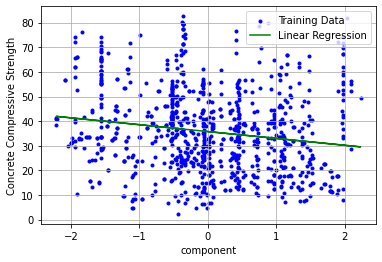

In [280]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_6_norm, y_train, 0, 0, 5000)
y_test_norm_pred = m * feature_6_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_7: Fine Aggregate

interations: 0, loss = 1559.368810774143, m = 0.005483723949613073, b = 7.134226002648063e-06
interations: 500, loss = 320.96473662741715, m = 0.04516637239594111, b = 0.00012446113174109378
interations: 1000, loss = 320.96464774241025, m = 0.04516628728666457, b = 0.00019112628822497664
interations: 1500, loss = 320.9645588575912, m = 0.045166202177478, b = 0.0002577913742403858
interations: 2000, loss = 320.96446997296016, m = 0.04516611706838139, b = 0.00032445638978739614
interations: 2500, loss = 320.96438108851686, m = 0.04516603195937474, b = 0.0003911213348660818
VE Score of the Training Set: -0.11857908170487197
VE Score of the Testing Set: -0.16126972027585418


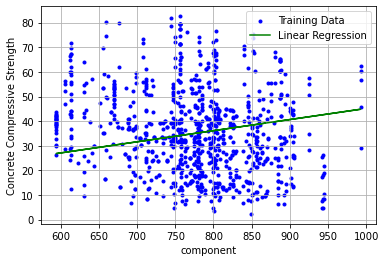

In [72]:
m, b, VE_score_train = gradient_descent(10**(-7), feature_7, y_train, 0, 0, 3000)
y_test_pred = m * feature_7_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 1559.368810774143, m = -0.00566336907103543, b = 0.07134226002648063
interations: 500, loss = 451.86394843235905, m = -1.7930899503839965, b = 22.587807343408194
interations: 1000, loss = 302.2793330927864, m = -2.4499893362473575, b = 30.862861681149194
interations: 1500, loss = 282.07575845657607, m = -2.691407253860893, b = 33.90403728482356
interations: 2000, loss = 279.3469722966204, m = -2.780131055708046, b = 35.02170354717094
interations: 2500, loss = 278.9784100970669, m = -2.812738051460591, b = 35.43245847775768
interations: 3000, loss = 278.9286304195923, m = -2.8247214893867283, b = 35.58341553773645
interations: 3500, loss = 278.9219069512267, m = -2.829125537696471, b = 35.63889395627872
VE Score of the Training Set: 0.027944220580275902
VE Score of the Testing Set: 0.01898025289970462


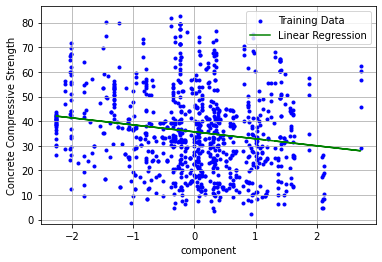

In [96]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_7_norm, y_train, 0, 0, 4000)
y_test_norm_pred = m * feature_7_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_8: Age

interations: 0, loss = 1559.368810774143, m = 0.3973726938635539, b = 0.007134226002648064
interations: 500, loss = 838.0390528030797, m = 0.3069046936552036, b = 2.024629669546793
interations: 1000, loss = 766.5713768624897, m = 0.2928108971744873, b = 3.914390788666321
interations: 1500, loss = 703.9018766220448, m = 0.27961310510459214, b = 5.684011511232918
interations: 2000, loss = 648.9474345096137, m = 0.2672543545182253, b = 7.341129688791884
interations: 2500, loss = 600.7582723764923, m = 0.25568130387103233, b = 8.892897601191514
interations: 3000, loss = 558.5015364725713, m = 0.24484400277441132, b = 10.346012826504092
interations: 3500, loss = 521.44690322701, m = 0.23469567640488084, b = 11.706747148410479
interations: 4000, loss = 488.95395705897323, m = 0.2251925236194868, b = 12.980973625815755
interations: 4500, loss = 460.4611220690217, m = 0.21629352790589879, b = 14.174191941530724
interations: 5000, loss = 435.4759563174713, m = 0.20796028035123756, b = 15.291552

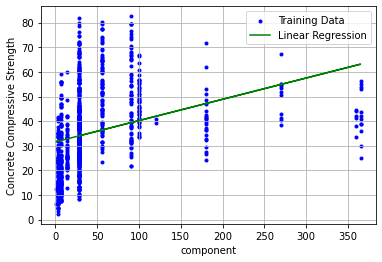

In [66]:
m, b, VE_score_train = gradient_descent(10**(-4), feature_8, y_train, 0, 0, 40000)
y_test_pred = m * feature_8_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 1559.368810774143, m = 0.010850427216303542, b = 0.07134226002648063
interations: 500, loss = 433.341782990283, m = 3.435374201273781, b = 22.587807343408194
interations: 1000, loss = 281.25548022059775, m = 4.693925230765816, b = 30.862861681149194
interations: 1500, loss = 260.71401636632845, m = 5.156456898916202, b = 33.904037284823566
interations: 2000, loss = 257.9395933604957, m = 5.326442492689331, b = 35.02170354717094
interations: 2500, loss = 257.56486724214784, m = 5.388914111564529, b = 35.432458477757685
interations: 3000, loss = 257.5142550379249, m = 5.411873134610303, b = 35.58341553773646
interations: 3500, loss = 257.50741912473154, m = 5.42031083398016, b = 35.63889395627873
VE Score of the Training Set: 0.027944220580275902
VE Score of the Testing Set: -0.197152712989618


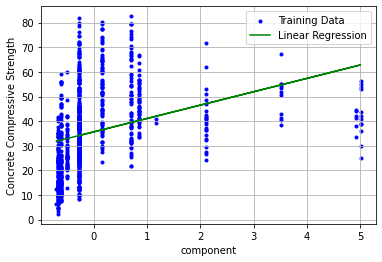

In [97]:
gradient_descent(10**(-3), feature_8_norm, y_train, 0, 0, 4000)
y_test_norm_pred = m * feature_8_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

# B) Multi-variate linear regression

In [290]:
X_train_norm = normalization(X_train)
X_test_norm = normalization(X_test)

In [291]:
ones = np.ones((900,1))
X_train = np.hstack((ones,X_train))
X_train_norm = np.hstack((ones,X_train_norm))
ones = np.ones((130,1))
X_test = np.hstack((ones,X_test))
X_test_norm = np.hstack((ones,X_test_norm))

In [292]:
def gradient_descent(alpha, X, y, num_iters):
    m = np.ones((9,1))
    b = 0
    
    for i in range(num_iters):
        y_pred = np.dot(X,m)+b
        
        loss = MSE(y_pred,y)
        VE_score_train = VE(y_pred,y)
        
        m_grad = (-2)*np.mean(np.dot(X.T,(y-y_pred)), axis=0)
        b_grad = (-2)*np.mean((y - y_pred), axis=0)

        m = m - alpha * m_grad
        b = b - alpha * b_grad
        
        if i % 500 == 0:
            print(f"interations: {i}, loss = {loss}, m = {m}, b = {b}")
    return (m, b,VE_score_train)

In [293]:
m, b, VE_score_train = gradient_descent(10**(-10), X_train, y_train, 2000)
y_test_pred = np.dot(X_test,m) + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 5540823.076527858, m = [[0.88749218]
 [0.88749218]
 [0.88749218]
 [0.88749218]
 [0.88749218]
 [0.88749218]
 [0.88749218]
 [0.88749218]
 [0.88749218]], b = [-4.70554855e-07]
interations: 500, loss = 256.41389738581836, m = [[0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]], b = [-4.147521e-06]
interations: 1000, loss = 256.41389736944535, m = [[0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]], b = [-4.17613299e-06]
interations: 1500, loss = 256.4138973530725, m = [[0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]
 [0.01507888]], b = [-4.20474497e-06]
VE Score of the Training Set: 0.079085332309912
VE Score of the Testing Set: 0.08544486339395163


In [201]:
m, b, VE_score_train = gradient_descent(10**(-4), X_train_norm, y_train, 40000)
y_test_norm_pred = np.dot(X_test,m) + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 1471.9082183959356, m = [[1.87039029]
 [1.87039029]
 [1.87039029]
 [1.87039029]
 [1.87039029]
 [1.87039029]
 [1.87039029]
 [1.87039029]
 [1.87039029]], b = [0.00697617]
interations: 500, loss = 654.5920567817786, m = [[17.73237298]
 [17.73237298]
 [17.73237298]
 [17.73237298]
 [17.73237298]
 [17.73237298]
 [17.73237298]
 [17.73237298]
 [17.73237298]], b = [1.76211288]
interations: 1000, loss = 603.8850421441572, m = [[17.09447794]
 [17.09447794]
 [17.09447794]
 [17.09447794]
 [17.09447794]
 [17.09447794]
 [17.09447794]
 [17.09447794]
 [17.09447794]], b = [3.35273175]
interations: 1500, loss = 558.9029601847825, m = [[16.49367095]
 [16.49367095]
 [16.49367095]
 [16.49367095]
 [16.49367095]
 [16.49367095]
 [16.49367095]
 [16.49367095]
 [16.49367095]], b = [4.85086998]
interations: 2000, loss = 518.9994535031126, m = [[15.92779565]
 [15.92779565]
 [15.92779565]
 [15.92779565]
 [15.92779565]
 [15.92779565]
 [15.92779565]
 [15.92779565]
 [15.92779565]], b = [6.2619045

interations: 22500, loss = 207.77598152224215, m = [[7.54730039]
 [7.54730039]
 [7.54730039]
 [7.54730039]
 [7.54730039]
 [7.54730039]
 [7.54730039]
 [7.54730039]
 [7.54730039]], b = [27.15903197]
interations: 23000, loss = 207.51547746506404, m = [[7.50157868]
 [7.50157868]
 [7.50157868]
 [7.50157868]
 [7.50157868]
 [7.50157868]
 [7.50157868]
 [7.50157868]
 [7.50157868]], b = [27.27304103]
interations: 23500, loss = 207.28438488478727, m = [[7.45851529]
 [7.45851529]
 [7.45851529]
 [7.45851529]
 [7.45851529]
 [7.45851529]
 [7.45851529]
 [7.45851529]
 [7.45851529]], b = [27.38042146]
interations: 24000, loss = 207.07938316144603, m = [[7.41795566]
 [7.41795566]
 [7.41795566]
 [7.41795566]
 [7.41795566]
 [7.41795566]
 [7.41795566]
 [7.41795566]
 [7.41795566]], b = [27.48155864]
interations: 24500, loss = 206.8975265803189, m = [[7.37975422]
 [7.37975422]
 [7.37975422]
 [7.37975422]
 [7.37975422]
 [7.37975422]
 [7.37975422]
 [7.37975422]
 [7.37975422]], b = [27.57681558]
interations: 250

# C) Mean Absolute Error as the loss function

In [318]:
def gradient_descent(alpha, X, y, m_init, b_init, num_iters):
    m = m_init
    b = b_init

    for i in range(num_iters):
        y_pred = m*X+b
        
        loss = MAE(y_pred,y)
        VE_score_train = VE(y_pred,y)
        
        m_grad = (-2)*np.mean(X*(y-y_pred))
        b_grad = (-2)*np.mean(y-y_pred)

        m = m - alpha * m_grad
        b = b - alpha * b_grad
        
        if i % 500 == 0:
            #print(m_grad)
            #print(b_grad)
            print(f"interations: {i}, loss = {loss}, m = {m}, b = {b}")

    plt.scatter(X, y, color='blue',marker= '.', label='Training Data')
    plt.plot(X, y_pred, color='green', label='Linear Regression')
    plt.grid()
    plt.legend()
    plt.xlabel('component')
    plt.ylabel('Concrete Compressive Strength')
    return (m, b, VE_score_train)

In [319]:
feature_1 = X_train[:,0].reshape(900,1)
feature_2 = X_train[:,1].reshape(900,1)
feature_3 = X_train[:,2].reshape(900,1)
feature_4 = X_train[:,3].reshape(900,1)
feature_5 = X_train[:,4].reshape(900,1)
feature_6 = X_train[:,5].reshape(900,1)
feature_7 = X_train[:,6].reshape(900,1)
feature_8 = X_train[:,7].reshape(900,1)

In [320]:
X_train_norm = normalization(X_train)
feature_1_norm = X_train_norm[:,0].reshape(900,1)
feature_2_norm = X_train_norm[:,1].reshape(900,1)
feature_3_norm = X_train_norm[:,2].reshape(900,1)
feature_4_norm = X_train_norm[:,3].reshape(900,1)
feature_5_norm = X_train_norm[:,4].reshape(900,1)
feature_6_norm = X_train_norm[:,5].reshape(900,1)
feature_7_norm = X_train_norm[:,6].reshape(900,1)
feature_8_norm = X_train_norm[:,7].reshape(900,1)

## Feature_1: Cement

interations: 0, loss = 35.79524171247305, m = 0.21735195431826063, b = 0.000715904834249461
interations: 500, loss = 12.354350866353132, m = 0.12190210891812153, b = 0.016497498097928477
interations: 1000, loss = 12.353234682863873, m = 0.12185158065185946, b = 0.032560190314710025
interations: 1500, loss = 12.352119817945182, m = 0.12180111207567998, b = 0.04860390734203778
VE Score of the Training Set: 0.15978801661672826
VE Score of the Testing Set: 0.23661788455921995


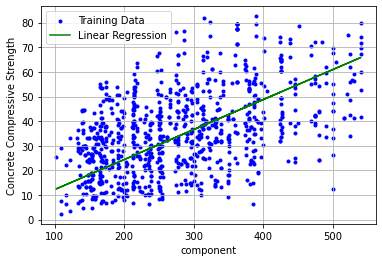

In [221]:
m, b, VE_score_train = gradient_descent(10**(-5), feature_1, y_train, 0, 0, 2000)
y_test_pred = m * feature_1_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 35.79524171247305, m = 0.016242425999619073, b = 0.0715904834249461
interations: 500, loss = 15.75953848931057, m = 5.142545093648305, b = 22.66639782120607
interations: 1000, loss = 12.215369808127958, m = 7.026519019813472, b = 30.970243819169763
interations: 1500, loss = 11.822874044683608, m = 7.718900641536595, b = 34.022000682022004
interations: 2000, loss = 11.804651802893844, m = 7.973358680176106, b = 35.14355567620776
interations: 2500, loss = 11.8123187520253, m = 8.066874873264995, b = 35.555739759512356
VE Score of the Training Set: 0.23810871452581206
VE Score of the Testing Set: 0.3049084007730256


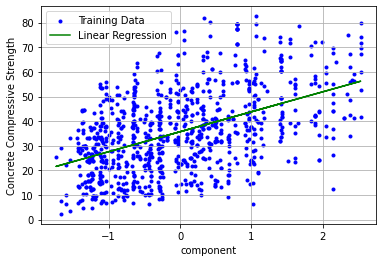

In [222]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_1_norm, y_train, 0, 0, 3000)
y_test_norm_pred = m * feature_1_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_2: Blast Furnace Slag

interations: 0, loss = 35.79524171247305, m = 0.05616103093915809, b = 0.000715904834249461
interations: 500, loss = 26.439723179154292, m = 0.2195535207190386, b = 0.19882888467609364
interations: 1000, loss = 26.31847614946448, m = 0.21843526204023808, b = 0.3948514450390416
interations: 1500, loss = 26.19793744308812, m = 0.21732353621172412, b = 0.5897288445694151
interations: 2000, loss = 26.07810292201112, m = 0.21621830506868425, b = 0.7834677732794754
interations: 2500, loss = 25.95896847239362, m = 0.21511953066926415, b = 0.9760748820985338
interations: 3000, loss = 25.84053000442874, m = 0.2140271752932652, b = 1.1675567831012772
interations: 3500, loss = 25.722783452202194, m = 0.21294120144084971, b = 1.3579200497347426
interations: 4000, loss = 25.605724773552705, m = 0.21186157183125345, b = 1.5471712170439993
interations: 4500, loss = 25.489349949933235, m = 0.2107882494015058, b = 1.735316781896476
interations: 5000, loss = 25.373654986273056, m = 0.20972119730515756, 

interations: 45500, loss = 18.299125275801355, m = 0.14110758344762173, b = 13.949827437629953
interations: 46000, loss = 18.243446082557803, m = 0.14044760474777626, b = 14.065516872446127
interations: 46500, loss = 18.188092166318974, m = 0.1397914816335124, b = 14.180530451334032
interations: 47000, loss = 18.133477241783872, m = 0.1391391915805575, b = 14.294872122633786
interations: 47500, loss = 18.07955210381598, m = 0.13849071219622522, b = 14.408545811619366
interations: 48000, loss = 18.02623492292961, m = 0.1378460212186471, b = 14.521555420633351
interations: 48500, loss = 17.973718650782356, m = 0.1372050965160086, b = 14.633904829220844
interations: 49000, loss = 17.92182134523428, m = 0.13656791608578805, b = 14.745597894262792
interations: 49500, loss = 17.870535028604923, m = 0.1359344580540028, b = 14.856638450108248
interations: 50000, loss = 17.81989751198262, m = 0.13530470067445746, b = 14.967030308706073
interations: 50500, loss = 17.770104770118706, m = 0.134678

interations: 90000, loss = 15.146753774513442, m = 0.09520182190941942, b = 21.996771389615486
interations: 90500, loss = 15.125762728129782, m = 0.09481002397410299, b = 22.06545069958339
interations: 91000, loss = 15.10489431112159, m = 0.09442051491639854, b = 22.133728786061276
interations: 91500, loss = 15.084286469914598, m = 0.09403328136471761, b = 22.201607992990702
interations: 92000, loss = 15.063930918931531, m = 0.0936483100255876, b = 22.26909065062012
interations: 92500, loss = 15.043780183441598, m = 0.09326558768319788, b = 22.336179075584376
interations: 93000, loss = 15.02393252541412, m = 0.09288510119894328, b = 22.40287557098478
interations: 93500, loss = 15.004349711149526, m = 0.09250683751097453, b = 22.469182426467892
interations: 94000, loss = 14.985201833923306, m = 0.09213078363374909, b = 22.535101918304267
interations: 94500, loss = 14.966428165312086, m = 0.0917569266575861, b = 22.60063630946645
interations: 95000, loss = 14.947764172188931, m = 0.09138

interations: 134500, loss = 14.005127553246735, m = 0.06794975666245548, b = 26.773858933096843
interations: 135000, loss = 13.998135484206578, m = 0.06771716488009302, b = 26.814630569894664
interations: 135500, loss = 13.991206337440465, m = 0.06748593189540505, b = 26.855164019407006
interations: 136000, loss = 13.984425270280184, m = 0.06725604977031584, b = 26.895460673120443
interations: 136500, loss = 13.977683818011688, m = 0.06702751061312429, b = 26.93552191439239
interations: 137000, loss = 13.97104963279816, m = 0.06680030657823252, b = 26.975349118498727
interations: 137500, loss = 13.96447470626124, m = 0.06657442986587553, b = 27.014943652681172
interations: 138000, loss = 13.957938190345686, m = 0.06634987272185518, b = 27.054306876193888
interations: 138500, loss = 13.951439860657253, m = 0.06612662743727381, b = 27.09344014035021
interations: 139000, loss = 13.944979494112559, m = 0.06590468634826814, b = 27.132344788569256
interations: 139500, loss = 13.9385568689315

interations: 177500, loss = 13.600455718549684, m = 0.05219062634770811, b = 29.536319115121614
interations: 178000, loss = 13.597410662932191, m = 0.05205009916626987, b = 29.560952501321363
interations: 178500, loss = 13.594383396483556, m = 0.05191039294249997, b = 29.585441979651538
interations: 179000, loss = 13.591466603280706, m = 0.051771502880375894, b = 29.609788390819777
interations: 179500, loss = 13.588582179397788, m = 0.05163342421189414, b = 29.633992570622194
interations: 180000, loss = 13.585722705397735, m = 0.05149615219690477, b = 29.658055349972372
interations: 180500, loss = 13.58292504567272, m = 0.051359682122950605, b = 29.681977554929553
interations: 181000, loss = 13.580143729833498, m = 0.05122400930510425, b = 29.70576000672722
interations: 181500, loss = 13.577378662399346, m = 0.051089129085807775, b = 29.729403521801185
interations: 182000, loss = 13.574629748447313, m = 0.05095503683471208, b = 29.752908911817745
interations: 182500, loss = 13.57189689

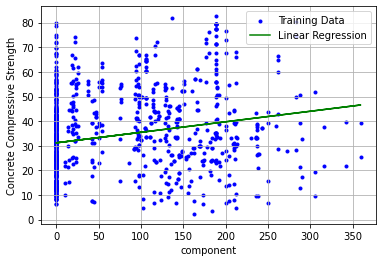

In [232]:
m, b, VE_score_train = gradient_descent(10**(-5), feature_2, y_train, 0, 0, 220000)
y_test_pred = m * feature_1_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 35.88880513783428, m = 0.003920661060814111, b = 0.07177761027566856
interations: 500, loss = 16.738518621924623, m = 1.2413278843086877, b = 22.725644405927792
interations: 1000, loss = 13.739018404400376, m = 1.696088965693827, b = 31.051195419364834
interations: 1500, loss = 13.406845398443881, m = 1.863218781373877, b = 34.11092911969039
interations: 2000, loss = 13.41955616975299, m = 1.9246408696584982, b = 35.23541569142574
interations: 2500, loss = 13.438175451195269, m = 1.947214178399926, b = 35.64867716247428
VE Score of the Training Set: 0.013701303419673239
VE Score of the Testing Set: -0.008079829073787348


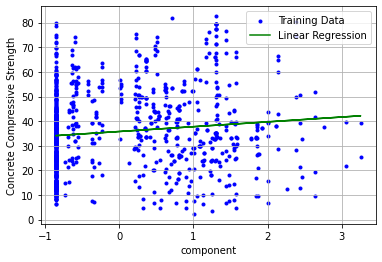

In [306]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_2_norm, y_train, 0, 0, 3000)
y_test_norm_pred = m * feature_2_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_3: Fly Ash

interations: 0, loss = 35.79524171247305, m = 0.36659751708006827, b = 0.00715904834249461
interations: 500, loss = 25.536888098070985, m = 0.24173600703663528, b = 2.11431477430557
interations: 1000, loss = 24.34013346169265, m = 0.22643882005398075, b = 4.103544003860404
interations: 1500, loss = 23.220806581497886, m = 0.21200346059559108, b = 5.980702137987918
interations: 2000, loss = 22.187939712954996, m = 0.19838137419962834, b = 7.752103145055172
interations: 2500, loss = 21.25027272811111, m = 0.18552674191187962, b = 9.423705271051524
interations: 3000, loss = 20.401744976185824, m = 0.1733963261701173, b = 11.001131080615524
interations: 3500, loss = 19.637302066933454, m = 0.1619493253711731, b = 12.489686368971284
interations: 4000, loss = 18.949009793969427, m = 0.15114723663155072, b = 13.89437800838623
interations: 4500, loss = 18.337938803977615, m = 0.14095372627996255, b = 15.219930789177969
interations: 5000, loss = 17.796126461239528, m = 0.131334507646181, b = 16

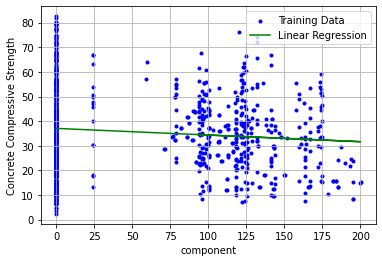

In [235]:
m, b, VE_score_train = gradient_descent(10**(-4), feature_3, y_train, 0, 0, 40000)
y_test_pred_3 = m * feature_3_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 35.79524171247305, m = -0.0038237168547409195, b = 0.0715904834249461
interations: 500, loss = 16.72106669200329, m = -1.2106341965978134, b = 22.66639782120607
interations: 1000, loss = 13.67336380411604, m = -1.6541506303829583, b = 30.970243819169763
interations: 1500, loss = 13.315744034473772, m = -1.8171479115131086, b = 34.022000682022004
interations: 2000, loss = 13.28494366775349, m = -1.877051246839555, b = 35.14355567620776
interations: 2500, loss = 13.285118296598604, m = -1.8990663967755068, b = 35.555739759512356
VE Score of the Training Set: 0.013169444584730572
VE Score of the Testing Set: -0.0033208996190234874


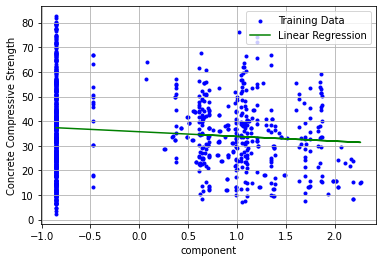

In [236]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_3_norm, y_train, 0, 0, 3000)
y_test_norm_pred = m * feature_3_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_4: Water

interations: 0, loss = 35.79524171247305, m = 0.1279462814914868, b = 0.000715904834249461
interations: 500, loss = 14.510597218350766, m = 0.19140585019507103, b = 0.011450525915592548
interations: 1000, loss = 14.510124095664683, m = 0.19134941227721172, b = 0.021838636298936936
interations: 1500, loss = 14.509651038207068, m = 0.191292982140334, b = 0.032225314494504206
VE Score of the Training Set: -0.203391295384582
VE Score of the Testing Set: -0.21828877250166512


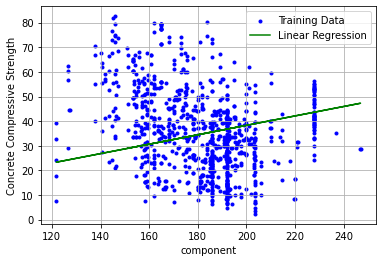

In [237]:
m, b, VE_score_train = gradient_descent(10**(-5), feature_4, y_train, 0, 0, 2000)
y_pred = m * feature_4_test + b
VE_score_test = VE(y_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 35.79524171247305, m = -0.009356278260915275, b = 0.0715904834249461
interations: 500, loss = 16.5724205581151, m = -2.962308885791235, b = 22.666397821206072
interations: 1000, loss = 13.420372936527366, m = -4.047552204118422, b = 30.970243819169763
interations: 1500, loss = 13.032087725839965, m = -4.446391337862192, b = 34.022000682022004
interations: 2000, loss = 13.029170434953642, m = -4.5929692083905085, b = 35.14355567620776
interations: 2500, loss = 13.039727674080568, m = -4.646838225522662, b = 35.555739759512356
VE Score of the Training Set: 0.07899073889529706
VE Score of the Testing Set: 0.11667311554725968


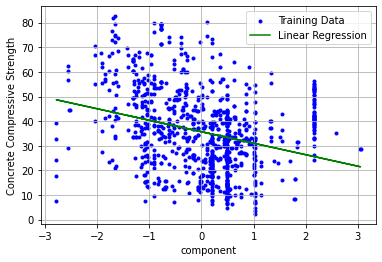

In [238]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_4_norm, y_train, 0, 0, 3000)
y_test_norm_pred = m * feature_4_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_5: Superplasticizer

interations: 0, loss = 35.79524171247305, m = 0.5100063170864769, b = 0.0715904834249461
interations: 500, loss = 15.75504040733729, m = 2.5578274019961715, b = 11.44316825581633
interations: 1000, loss = 13.708495236271048, m = 1.971456067331668, b = 18.33361611712728
interations: 1500, loss = 12.915549471484244, m = 1.608009766522927, b = 22.604472548985132
interations: 2000, loss = 12.635679332744065, m = 1.3827374761454705, b = 25.251646583050213
interations: 2500, loss = 12.558483124428102, m = 1.2431085826913844, b = 26.89242530704496
interations: 3000, loss = 12.541987186847642, m = 1.1565634161529468, b = 27.909417309259354
interations: 3500, loss = 12.545777636750476, m = 1.102920751902881, b = 28.539772102043298
VE Score of the Training Set: 0.12935563464815525
VE Score of the Testing Set: 0.1609124869171784


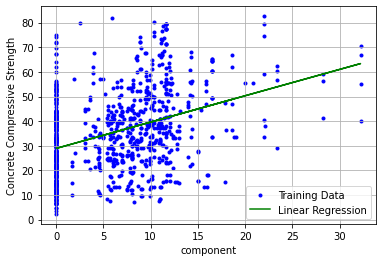

In [239]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_5, y_train, 0, 0, 4000)
y_pred = m * feature_5_test + b
VE_score_test = VE(y_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 35.79524171247305, m = 0.01200368282154181, b = 0.0715904834249461
interations: 500, loss = 16.206001643450872, m = 3.8005086309814824, b = 22.66639782120607
interations: 1000, loss = 12.932512161851562, m = 5.1928268385122935, b = 30.970243819169763
interations: 1500, loss = 12.576000753913835, m = 5.704519450122416, b = 34.022000682022004
interations: 2000, loss = 12.548709947089494, m = 5.892572243916386, b = 35.14355567620776
interations: 2500, loss = 12.554183326763713, m = 5.961683762143001, b = 35.555739759512356
VE Score of the Training Set: 0.13003485590821895
VE Score of the Testing Set: 0.15816108038213494


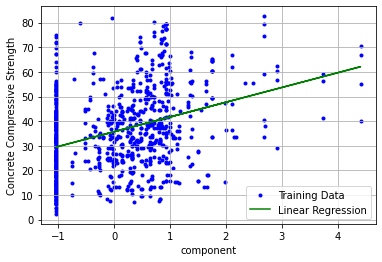

In [240]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_5_norm, y_train, 0, 0, 3000)
y_test_norm_pred = m * feature_5_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_6: Coarse Aggregate

interations: 0, loss = 35.88880513783428, m = 0.0694395001784894, b = 7.177761027566856e-05
interations: 500, loss = 13.911218655897066, m = 0.03647807539594534, b = 0.0004523879271611163
interations: 1000, loss = 13.911210377909729, m = 0.03647765210467896, b = 0.000866673133442879
interations: 1500, loss = 13.911202099975235, m = 0.03647722881611449, b = 0.0012809556952795619
VE Score of the Training Set: -0.07673842799451269
VE Score of the Testing Set: -0.0033778106743143077


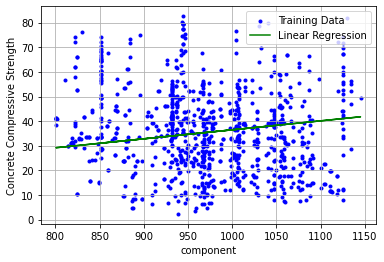

In [308]:
m, b, VE_score_train = gradient_descent(10**(-6), feature_6, y_train, 0, 0, 2000)
y_test_pred = m * feature_6_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 36.09871238506254, m = -0.00511770030007294, b = 0.07219742477012508
interations: 500, loss = 16.64851809998178, m = -1.6203247328643944, b = 22.858562663875283
interations: 1000, loss = 13.572784385432422, m = -2.2139314962562113, b = 31.23280834653234
interations: 1500, loss = 13.235795422070979, m = -2.4320886627620295, b = 34.31043788584781
interations: 2000, loss = 13.24511615094403, m = -2.5122638767806653, b = 35.44150137982705
interations: 2500, loss = 13.2698811654918, m = -2.541729170293094, b = 35.85717994382256
VE Score of the Training Set: 0.023582046778569787
VE Score of the Testing Set: -0.043977995766463884


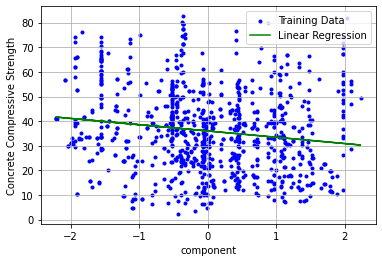

In [321]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_6_norm, y_train, 0, 0, 3000)
y_test_norm_pred = m * feature_6_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_7: Fine Aggregate

interations: 0, loss = 35.79524171247305, m = 0.005484083689802878, b = 7.1590483424946094e-06
interations: 500, loss = 14.234946863149105, m = 0.04547161698998501, b = 0.00012581178012534728
interations: 1000, loss = 14.234944801496694, m = 0.04547153061681347, b = 0.0001932471087907358
interations: 1500, loss = 14.234942739846492, m = 0.045471444243734616, b = 0.00026068236509934673
VE Score of the Training Set: -0.12436492026992685
VE Score of the Testing Set: -0.10731157591488194


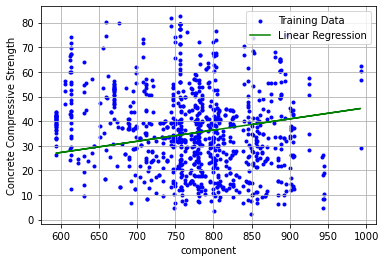

In [246]:
m, b, VE_score_train = gradient_descent(10**(-7), feature_7, y_train, 0, 0, 2000)
y_test_pred = m * feature_7_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 35.79524171247305, m = -0.005634980182651857, b = 0.0715904834249461
interations: 500, loss = 16.520148535150344, m = -1.7841016909531433, b = 22.66639782120607
interations: 1000, loss = 13.383127963451281, m = -2.4377082235500898, b = 30.970243819169763
interations: 1500, loss = 13.042185388874378, m = -2.6779159805276254, b = 34.022000682022004
interations: 2000, loss = 13.059151821437476, m = -2.766195034720865, b = 35.14355567620776
interations: 2500, loss = 13.079922424362506, m = -2.798638580705024, b = 35.555739759512356
VE Score of the Training Set: 0.028634014103229632
VE Score of the Testing Set: 0.023814454739420676


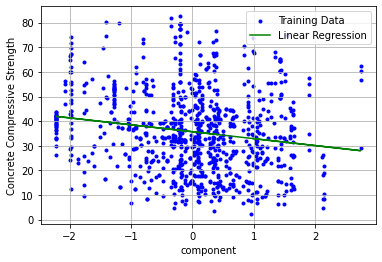

In [247]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_7_norm, y_train, 0, 0, 3000)
y_test_norm_pred = m * feature_7_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Feature_8: Age

interations: 0, loss = 35.79524171247305, m = 0.41113740853080344, b = 0.00715904834249461
interations: 500, loss = 24.428543361600134, m = 0.29551014135355136, b = 2.0467391727856734
interations: 1000, loss = 22.98404857953491, m = 0.28184535932240484, b = 3.9565865247614487
interations: 1500, loss = 21.655500731888413, m = 0.2690542944386381, b = 5.744319497122846
interations: 2000, loss = 20.474360560061623, m = 0.25708108180430495, b = 7.417746002734317
interations: 2500, loss = 19.41358520862171, m = 0.24587342848617597, b = 8.984174721663193
interations: 3000, loss = 18.488000007919407, m = 0.23538238512667017, b = 10.450447021795451
interations: 3500, loss = 17.665174761978392, m = 0.22556213215783538, b = 11.822966838468124
interations: 4000, loss = 16.95549263926337, m = 0.21636977968466325, b = 13.107728643618026
interations: 4500, loss = 16.35587192545695, m = 0.20776518016373455, b = 14.31034362660132
interations: 5000, loss = 15.834427770610425, m = 0.199710753059068, b = 

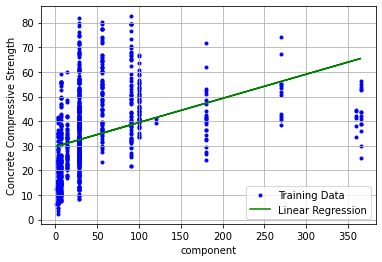

In [249]:
m, b, VE_score_train = gradient_descent(10**(-4), feature_8, y_train, 0, 0, 20000)
y_test_pred = m * feature_8_test + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 35.79524171247305, m = 0.010826286037788091, b = 0.0715904834249461
interations: 500, loss = 16.024298503540784, m = 3.4277308172662195, b = 22.66639782120607
interations: 1000, loss = 12.780506515418722, m = 4.683481689265088, b = 30.970243819169763
interations: 1500, loss = 12.4803723001436, m = 5.144984268021362, b = 34.022000682022004
interations: 2000, loss = 12.500343909578177, m = 5.314591659859893, b = 35.14355567620776
interations: 2500, loss = 12.527422180248912, m = 5.376924285267529, b = 35.555739759512356
VE Score of the Training Set: 0.10577137589801644
VE Score of the Testing Set: 0.2010240292652078


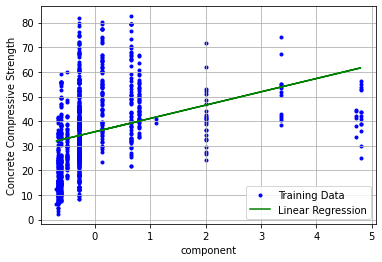

In [250]:
m, b, VE_score_train = gradient_descent(10**(-3), feature_8_norm, y_train, 0, 0, 3000)
y_test_norm_pred = m * feature_8_test_norm + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

## Multi-variate

In [260]:
X_train_norm = normalization(X_train)
X_test_norm = normalization(X_test)

In [261]:
ones = np.ones((900,1))
X_train = np.hstack((ones,X_train))
X_train_norm = np.hstack((ones,X_train_norm))
ones = np.ones((130,1))
X_test = np.hstack((ones,X_test))
X_test_norm = np.hstack((ones,X_test_norm))

In [262]:
def gradient_descent(alpha, X, y, num_iters):
    m = np.ones((9,1))
    b = 0

    y_pred = np.dot(X,m)+b
    
    for i in range(num_iters):
        y_pred = np.dot(X,m)+b
        VE_score_train = VE(y_pred,y)
        
        loss = MAE(y_pred,y)
        
        m_grad = (-2)*np.mean(np.dot(X.T,(y-y_pred)), axis=0)
        b_grad = (-2)*np.mean((y - y_pred), axis=0)

        m = m - alpha * m_grad
        b = b - alpha * b_grad
        
        if i % 500 == 0:
            print(f"interations: {i}, loss = {loss}, m = {m}, b = {b}")
    return (m, b,VE_score_train)

In [263]:
m, b, VE_score_train = gradient_descent(10**(-10), X_train, y_train, 2000)
y_test_pred = np.dot(X_test,m) + b
VE_score_test = VE(y_test_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 2355.7733407056116, m = [[0.8871987]
 [0.8871987]
 [0.8871987]
 [0.8871987]
 [0.8871987]
 [0.8871987]
 [0.8871987]
 [0.8871987]
 [0.8871987]], b = [-4.71154668e-07]
interations: 500, loss = 12.81925732904307, m = [[0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]], b = [-4.14230592e-06]
interations: 1000, loss = 12.81925732859606, m = [[0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]], b = [-4.17140316e-06]
interations: 1500, loss = 12.819257328149051, m = [[0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]
 [0.01513017]], b = [-4.20050041e-06]
VE Score of the Training Set: 0.08112861953639805
VE Score of the Testing Set: 0.07204250268794221


In [264]:
m, b, VE_score_train = gradient_descent(10**(-3), X_train_norm, y_train, 4000)
y_test_norm_pred = np.dot(X_test,m) + b
VE_score_test = VE(y_test_norm_pred,y_test)
print(f"VE Score of the Training Set: {VE_score_train}")
print(f"VE Score of the Testing Set: {VE_score_test}")

interations: 0, loss = 34.89536818327749, m = [[9.69591247]
 [9.69591247]
 [9.69591247]
 [9.69591247]
 [9.69591247]
 [9.69591247]
 [9.69591247]
 [9.69591247]
 [9.69591247]], b = [0.06979074]
interations: 500, loss = 14.750608841959119, m = [[13.13693774]
 [13.13693774]
 [13.13693774]
 [13.13693774]
 [13.13693774]
 [13.13693774]
 [13.13693774]
 [13.13693774]
 [13.13693774]], b = [13.20114207]
interations: 1000, loss = 12.144886612875819, m = [[10.24989155]
 [10.24989155]
 [10.24989155]
 [10.24989155]
 [10.24989155]
 [10.24989155]
 [10.24989155]
 [10.24989155]
 [10.24989155]], b = [20.39539021]
interations: 1500, loss = 11.511795696987319, m = [[8.66395614]
 [8.66395614]
 [8.66395614]
 [8.66395614]
 [8.66395614]
 [8.66395614]
 [8.66395614]
 [8.66395614]
 [8.66395614]], b = [24.34739239]
interations: 2000, loss = 11.386878736242522, m = [[7.79275736]
 [7.79275736]
 [7.79275736]
 [7.79275736]
 [7.79275736]
 [7.79275736]
 [7.79275736]
 [7.79275736]
 [7.79275736]], b = [26.51833798]
interati